## INCLINATION OF MEDIA HOUSES TOWARDS GST
Submitted by 
Imtiaz khan


## Table of Contents

#### Introduction

#### Approach and Methodology

   ##### Data Collection through Google API
   ##### Data Cleaning
   ##### Data Analysis

#### Conclusion



## Introduction 
The Goods and Services Tax Bill proposed is one of the most important tax reform which would have a positive impact on the Indian economy. Goods and Services Tax can be defined as consumption based tax which is levied when a consumer buys goods or services. More than 150 countries have already adopted GST.
GST is being introduced majorly for two reasons
  1: The current indirect taxation structure is full of uncertainties due to multiple rates
  2: Due to multiple rates there are multiple reforms and intern cumbersome compliances. 

This would ease taxation structure and would provide a unified taxation approach. We can say through this reform transparency would be achieved.
	
  There is a tension created among the state legislatures, since the taxes imposed by state governments like for example “Value added Tax” (VAT) would be abolished and the states would lose in the revenue front. This has been rightly answered by the Article 246A “Transfer of power to the States” implying the state legislatures will have power to make laws with respect to goods and services tax imposed by union or state.
GST is a single umbrella tax. Implementation of GST would result in amalgamation of the union and state level taxes.

The taxes considered for inclusion are mentioned below

UNION TAXES                     STATE TAXES
Central Excise                 Duty	VAT/Sales Tax
Addition Excise Duty           Octroi and Entry Tax
Service Tax	                   Purchase Tax
Additional Duty on Customs	   State cesses/Surcharges

The GST will be administered by a council which would consist of union finance minister as the chairman, union minister of state in charge of revenue or finance, minister in charge of finance or taxation. The spirit of constitution will be maintained by this structure and democratic decisions would be taken. The objective of GST council is to decide which goods/services are subject to GST, which state/union taxes would be included in GST. Dispute Central Authority would resolve the disputes between central and states in regards to GST if the state is not content about the share in GST.
 
## WHY?
In view of the above information presented by the government on GST. We want to answer the question through Data “Is GST welcomed warmly by all the media Houses?” 
		


## Approach and Methodology

We want to give a data proof through sentiment analysis of the media houses on the proposed GST Bill. In order to avoid sampling bias we have picked three online news sources namely  “Hindustan Times” ”Indian Express” and “Live Mint” . The idea is to web scrape articles pertaining to these sources and to perform methods to get the polarity of each document and then to categorize them into positive, neutral and negative. The majority among the sentiments would serve as a proxy to indicate the current sentiment of media houses towards GST.

#### Data Collection through Google API

The analysis of the data is done through python (specific Jupiter notebook). The	data is extracted from online media houses through google search application programming interface. The top articles pertaining to GST are picked up. We picked 57 articles which are relevant to the context of GST. 

#### Data Cleaning

The textual data was really messy and has to come with some cleaning methods. The cleaning methods included removal numbers, punctuations, tags, url’s ,non-asci characters, newline constants , tab space constants, extra spaces. This was cleaned through by writing regular expressions by looking at some of the patterns. The cleansed data was then stored into a data frame which contained URL location from where the data was collected along with cleansed text.

##### Data Analysis

The cleansed data from the previous stage was fed into a model called which would tokenize the text and give us polarity based on the context of the text. The package called “textblob” reads in the cleansed text and gives the sentiment based on the polarity. A positive polarity indicates positive sentiment, a negative polarity indicates negative and a zero polarity indicates neutral sentiment. Out of the 57 rows of text, 54 were classified as positive, 2 as negative and 1 as neutral. This result seems obvious given the benefits of the scheme to both government and to the people. We have arrived at a win-win situation for both the sides. The results are only indication of current acceptance of the media.

#### Technology stack: python, IPython Notebook

## Conclusion
The analysis on the top media houses from randomized articles on GST suggest that the media by far is positively inclined towards Goods and services and task. Alas at least the unified tax system unifies the top media houses on their views.



## Importing required packages For Conducting Sentimental Analysis

In [ ]:

from bs4 import BeautifulSoup
import requests
from google import search
import re
import os
from urllib.request import Request,  urlopen
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Defining a html parser to get the text of the content from website

In [4]:
def requestPage(url): 
    try:
        response = requests.get(url)  
        page  = BeautifulSoup(response.text, 'html.parser')
        return page
        
    except(ConnectionError, Exception) as e:
        print("Exception is :", e)


In [5]:
#initializing the randomized media houses.
topMediaHouses=['hindustantimes','indianexpress','livemint']

## Using Google Search API getting the data regarding GST

In [9]:
search_terms=topMediaHouses
for sterm in search_terms:
    urllist = []
    for url in search("GST "+sterm, tld='co.in', lang='en', stop=15):
        url = re.sub("#.*$","",url)
        url = re.sub(".*.pdf$","https://www.google.co.in/",url) # remove pdf links
        urllist.append(url)


## Storing the set of urls from the search into a csv file

In [13]:
Newslist=pd.DataFrame({'url':urllist})
Newslist.to_csv("Newslist.csv")

In [17]:
newslist=pd.read_csv("Newslist.csv")
newslist.head()

,0,url
0,1,http://www.newindianexpress.com/nation/2016/no...
1,2,http://www.hindustantimes.com/opinion/a-delay-...
2,3,http://www.newindianexpress.com/business/2016/...
3,4,http://www.hindustantimes.com/business-news/je...
4,5,http://indianexpress.com/article/explained/gst...


## Cleaning and preprocessing the text.

In [ ]:
ExtractedText=[]
cleanr = re.compile('<.*?>')
for url in  newslist['url']:
    page=requestPage(url)
    page.select('p')
    cleantext = re.sub(cleanr, '', str(page.select('p')))
    cleantext=re.sub(r'[^\x00-\x7F]','', cleantext)
    cleantext=re.sub('[0-9]+', '', cleantext)
    cleantext=re.sub("\\\\u",'',cleantext.encode('utf-8'))
    cleantext=re.sub("\|",'',cleantext)
    cleantext=re.sub("\\\\xe",'',cleantext)
    cleantext=re.sub("\\\\n",'',cleantext)
    cleantext=re.sub("\\\\t",'',cleantext)
    cleantext=re.sub("\\\\r",'',cleantext)
    cleantext=re.sub("\\\\xa",'',cleantext)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    cleantext = re.sub(r'['+string.punctuation+']+', ' ', cleantext)
    # Remove hyperlinks
    cleantext = re.sub(r'https?:\/\/.*\/\w*','',cleantext)
    #Remove any whitespace at the front of the sentence
    cleantext=cleantext.lstrip(' ')
    # Remove multiple whitespace
    cleantext= re.sub(' +',' ',cleantext)
    ExtractedText.append(cleantext)

## Storing the Extracted text into a csv file

In [ ]:
PracticumData=pd.DataFrame({'url':newslist['url'],'text':ExtractedText})
PracticumData.to_csv("practicumData.csv")

In [120]:
PracticumData=pd.read_csv("practicumData.csv")
PracticumData.head()

,Unnamed: 0,text,url
0,0,[ By Express News Service ...,http://www.newindianexpress.com/nation/2016/no...
1,1,[The storm over demonetisation and lack of con...,http://www.hindustantimes.com/opinion/a-delay-...
2,2,[ By M RajendranExpress News Servic...,http://www.newindianexpress.com/business/2016/...
3,3,[Indias gems and jewellery industry wants the ...,http://www.hindustantimes.com/business-news/je...
4,4,[ The Bill has been described as a reform meas...,http://indianexpress.com/article/explained/gst...


## Calculating polarity of each article and categorizing them into corresponding sentiments

In [121]:
# Find polarity and subjectivity of the reviews ( sentiment analysis)
# The x in the lambda function is a row (because I set axis=1)
# Apply iterates the function accross the dataframe's rows
PracticumData['polarity'] = PracticumData.text.apply(lambda s: TextBlob(s).sentiment.polarity)
PracticumData['subjectivity'] = PracticumData.text.apply(lambda s: TextBlob(s).sentiment.subjectivity)
PracticumData['len_words'] = PracticumData.text.apply(lambda x: len(TextBlob(x).words))
PracticumData['len_sentences'] = PracticumData.text.apply(lambda x: len(TextBlob(x).sentences))
PracticumData['words_per_sentence'] = PracticumData.len_words / PracticumData.len_sentences
PracticumData.head(5) 


#Mapping sentiments as positive, negative and neutral
def sentiment(desc):
  if desc['polarity'] > 0:
    return 'positive'
  elif desc['polarity'] < 0:
    return 'negative'
  elif desc['polarity'] == 0:
    return 'zero'
  else:
    return 'Undefined'

PracticumData['sentiments'] = PracticumData.apply(sentiment, axis = 1)
PracticumData.head()

PracticumData.to_csv("Newslist_With_Polarity.csv")


    

## Plotting the data and sentiments achieved.

In [79]:
PracticumData.head()

,Unnamed: 0,text,url,polarity,subjectivity,len_words,len_sentences,words_per_sentence,sentiments
0,0,[ By Express News Service ...,http://www.newindianexpress.com/nation/2016/no...,0.097716,0.454737,812,28,29.000000,positive
1,1,[The storm over demonetisation and lack of con...,http://www.hindustantimes.com/opinion/a-delay-...,0.077761,0.410918,765,28,27.321429,positive
2,2,[ By M RajendranExpress News Servic...,http://www.newindianexpress.com/business/2016/...,0.075561,0.399144,510,20,25.500000,positive
3,3,[Indias gems and jewellery industry wants the ...,http://www.hindustantimes.com/business-news/je...,0.144719,0.527162,340,15,22.666667,positive
4,4,[ The Bill has been described as a reform meas...,http://indianexpress.com/article/explained/gst...,0.068870,0.401455,701,26,26.961538,positive


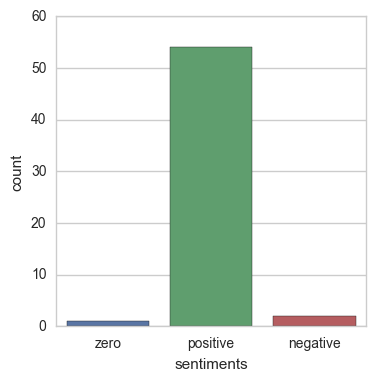

In [116]:
#Plotting the sentiments
plt.figure(figsize=(4,4))
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="sentiments", data=PracticumData,order=['zero','positive','negative']);


## Conclusion

The analysis on the top media houses from randomized articles on GST suggest that the media by far positive inclined towards Goods and services and task. Alas atleast the unified tax system unifies the top media houses on their views. 